In [2]:
import numpy as np
import menzalib as mz
import pylab as pl
from scipy.optimize import curve_fit
from inspect import signature
from scipy.constants import c

In [3]:
def lin(x,a,b):
    return a*x+b

def dsen(x,dx):
    return dx*np.cos(x)
dsin=np.vectorize(dsen)

#misurando gli angoli in senso orario
def func(alpha,alphar,theta0,d):
    ang_r=(np.pi-alphar+theta0)/2
    ang=np.pi+theta0-ang_r-alpha
    return d*(np.sin(ang_r)-np.sin(ang))



def cosa(alpha,alphar,theta0):
    ang_r=(np.pi-alphar+theta0)/2
    ang=np.pi+theta0-ang_r-alpha
    return np.sin(ang_r)-np.sin(ang)


def Colore(wavelength, gamma=0.8):

    '''This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    '''

    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    R *= 255
    G *= 255
    B *= 255
    #return (int(R), int(G), int(B))
    return (R/255, G/255, B/255)



# Determinazione di d

0.0011948499537351347 2.7091878006920848e-11
836.9251694524252 3.6457997723237363
$(8.37 \pm 0.04) \times 10^{2}$


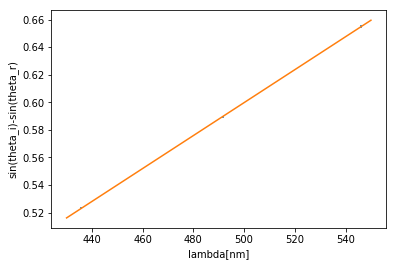

In [27]:
zero,dzero=168.63,0.02
zero,dzero=zero*np.pi/180,dzero*np.pi/180
d,dd=836.019,0.434

dati=np.transpose(np.transpose(np.genfromtxt('Mercurio.csv',delimiter=','))[1:])

#inizializzo gli array di numpy
thetam,dthetam=np.empty(len(dati)),np.empty(len(dati))
#gli assegno i valori
for i in range(len(dati)):
    thetam[i]=dati[i][0]+dati[i][1]/60 
    dthetam[i]=dati[i][2]/60

#converto theta da gradi in radianti
thetam,dthetam=thetam*np.pi/180,dthetam*np.pi/180
#chiamo l'angolo di rifressione thetar 
thetar,dthetar=thetam[0],dthetam[0]
thetam,dthetam=thetam[1:],dthetam[1:]

#calcolo le x e gli errori sulla x
x,dx=np.empty(len(thetam)),np.empty(len(dthetam))
x=cosa(thetam,thetar,zero)
for i in range(len(dx)):
    dx[i]=np.sqrt(mz.dy(cosa,[thetam[i],thetar,zero],[dthetam[i],dthetar,dzero]))

#lunghezze d'onda, fonte: http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/atspect2.html
lambdai=[435.835,491.604,546.074]
pl.errorbar(lambdai,x,yerr=dx,fmt=' ')

popt,pcov=curve_fit(lin,lambdai,x,sigma=dx)
print(popt[0],pcov[0][0])
d,dd=1/popt[0],mz.drapp(1,0,popt[0],np.sqrt(pcov[0][0]))
print(d,dd)
print(mz.ne_tex(d,dd))
x=np.linspace(430,550,10)
pl.plot(x,lin(x,*popt))
pl.ylabel('sin(theta_i)-sin(theta_r)')
pl.xlabel('lambda[nm]')
#pl.savefig('passo_reticolare.eps',format='eps')
pl.savefig('passo_reticolare.png')

$d[\sin(\theta_r)-\sin(\theta_i)]=\lambda$

[435.67683594 438.85896398 487.97034319]
['$(4.36 \\pm 0.02) \\times 10^{-7}$' '$(4.39 \\pm 0.02) \\times 10^{-7}$'
 '$(4.88 \\pm 0.02) \\times 10^{-7}$' '$(5.49 \\pm 0.02) \\times 10^{-7}$'
 '$(5.50 \\pm 0.02) \\times 10^{-7}$' '$(6.19 \\pm 0.03) \\times 10^{-7}$'
 '$(6.59 \\pm 0.03) \\times 10^{-7}$' '$(4.36 \\pm 0.02) \\times 10^{-7}$'
 '$(4.39 \\pm 0.02) \\times 10^{-7}$' '$(4.88 \\pm 0.02) \\times 10^{-7}$']


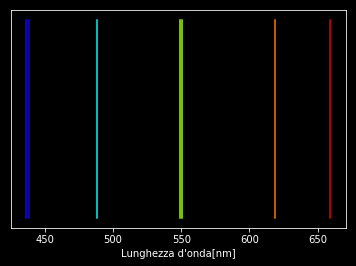

In [40]:


#prendo i dati dall file "Idrogeno.csv" e rimuovo la prima colonna
dati=np.transpose(np.transpose(np.genfromtxt('Idrogeno.csv',delimiter=','))[1:])



#inizializzo gli array di numpy
theta,dtheta=np.empty(len(dati)),np.empty(len(dati))
#gli assegno i valori
for i in range(len(dati)):
    theta[i]=dati[i][0]+dati[i][1]/60 
    dtheta[i]=dati[i][2]/60
        
#converto theta da gradi in radianti
theta,dtheta=theta*np.pi/180,dtheta*np.pi/180
#chiamo l'angolo di rifressione thetar 
thetar,dthetar=theta[0],dtheta[0]
theta,dtheta=theta[1:],dtheta[1:]

#calcolo la lunghezza d'onda secondo la formula del professor forti per le rifrazioni del primo ordine
lung=func(theta,thetar,zero,d)
#calcolol'errore associata all lunghezza d'onda con la funzione "dy" di menzalib
dlung=np.empty(len(lung))
for i in range(len(lung)):
    dlung[i]=np.sqrt(mz.dy(func,np.array([theta[i],thetar,zero,d]),([dtheta[i],dthetar,dzero,dd])))

lung[-3:],dlung[-3:]=lung[-3:]/2,dlung[-3:]/2
print(lung[-3:])
#questo serve per colorare le linee
#colore=['purple','purple','blue','limegreen','limegreen','red','red']
#for i in range (len(colore)): print(Colore(lung[i]))

#plotto
with pl.style.context(('dark_background')):
    for i in range(len(lung[:-3])):
        pl.plot([lung[i],lung[i]],[1,-1],color=Colore(lung[i]))
    pl.yticks([])
    pl.xlabel('Lunghezza d\'onda[nm]')
    #pl.show()
    pl.savefig('idrogeno.eps',format='eps')

    lung,dlung=lung*1e-9,dlung*1e-9
    freq,dfreq=c/lung,mz.drapp(c,0,lung,dlung)
    print(mz.ne_tex(lung,dlung))


# Stima del numero di Rydemberg R

$\frac 1 \lambda=R\Big(\frac 1 {n_1^2}-\frac 1 {n_2^2}\Big)$

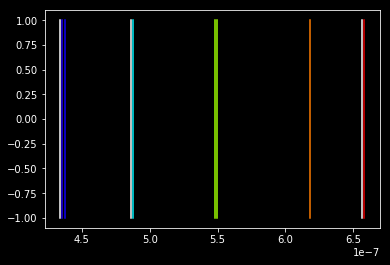

In [6]:
Rth=1.09737e7#m^-1  
with pl.style.context(('dark_background')):
    for i in range(len(lung)):
        pl.plot([lung[i]-dlung[i],lung[i]-dlung[i]],[1,-1],color=Colore(lung[i]*1e9))
    for i in range(1,100):
        for j in range(i+1,i+200):
            l=1/(Rth*(1/i**2-1/j**2))
            if l<lung.max()+2e-8 and l>lung.min()-2e-8:pl.plot([l,l],[1,-1],color='white')

[['$(1.0925 \\pm 0.0002) \\times 10^{7}$']] [['$1.0974 \\times 10^{7}$']]
[-21.6322761]


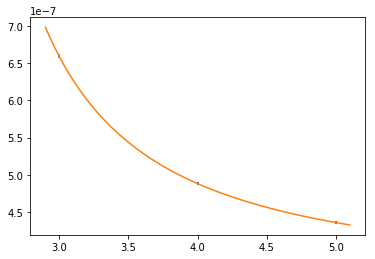

In [58]:
pl.close()
lunghezze=[lung[0],lung[2],lung[-4],lung[-3],lung[-1]]
dlunghezze=[dlung[0],dlung[2],dlung[-4],dlung[-3],dlung[-1]]
numero=[5,4,3,5,4]

def Ryd(n,R):
    return 1/(R*(1/4-1/n**2))

pl.errorbar(numero,lunghezze,dlunghezze,fmt=' ')
popt,pcov=curve_fit(Ryd,numero,lunghezze,sigma=dlunghezze)
x=np.linspace(2.9,5.1,100)
y=Ryd(x,popt)
pl.plot(x,y)
print(mz.ne_tex(popt,np.sqrt(pcov)),mz.ns_tex(Rth,nult=np.sqrt(pcov)))
print((popt-Rth)/np.sqrt(pcov[0][0]))